## Анализ продаж интернет-магазина "Стримчик"

**Описание проекта**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Описание данных**
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

*Данные за 2016 год могут быть неполными.*


## Загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

Импортируем необходимые для работы бибилиотеки

In [2]:
data = pd.read_csv('/datasets/games.csv')
display(data.head())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Загружаем датасет и просматриваем первые 5 строк для ознакомления. Здесь сразу видим пропущенные значения, возьмем это на заметку.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Получаем общую информацию о данных, могу отметить, что не все столбцы имеют верный тип данных, как, например, столбец Year_of_Release.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Отличное начало. Нами получена первичная информация о данных. 

## Предобработка данных

In [4]:
data.columns = data.columns.str.lower()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Привели названия стобцов к нижнему регистру.

In [5]:
data.duplicated().sum()

0

In [6]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Видим достаточно большое колчество пропущенных значений.

In [7]:
data = data.dropna(subset=['name', 'year_of_release', 'genre'])

In [8]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

Здесь хотелось бы подробно описать данное решение: во-первых пропущенные значения с названием и жанром игры мы никак не сможем заполнить, во-вторых, рассчитывать медиану/среднее значения года выпуска тоже будет некорректно, поэтому я принял решение просто удалить эти пропуски.

In [9]:
data['year_of_release'] = data['year_of_release'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


После этого заменим тип данных в столбце year_of_release c float на int.

In [10]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [11]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Здесь пропущенные значения заменю на 0 и преобразую тип данных во float
После внимательного изучения заметил значение "tbd" - To Be Determined (будет определено). Значит, рейтинга по этим играм также нет, заменю эти значения также на 0.

In [12]:
data['critic_score'] = data['critic_score'].fillna(0)
data['user_score'] = data['user_score'].fillna(0)
data['user_score'] = data['user_score'].replace('tbd', 0)
data['critic_score'] = data['critic_score'].astype(float)
data['user_score'] = data['user_score'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [13]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Здесь пропущенные значения есть там, где рейтинг не определен. Поэтому заменю их на n/d или же not defined.

In [14]:
data['rating'] = data['rating'].fillna('n/d')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Все пропуски устранены и данные с каждом столбце имеют корректный тип. Пропуски могли возникнуть из-за человеческого фактора, из-за технической неполадки или из-за неполноты датасета. В любом случае, пропуски всегда влияют на конечную статистику и выводы после проведенного исследования.

In [16]:
display(data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,n/d
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,n/d


Еще раз взглянем на датафрейм и посчитаем суммарные продажи во всех регионах.

In [17]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
display(data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,n/d,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,n/d,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,n/d,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.0,0.0,n/d,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,n/d,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.0,0.0,n/d,0.01


**Выводы по предобработке данных**

1. Названия столбцов приведены к единому, нижнему, регистру
2. Устранены все пропуски в значениях для дальнейшей корректной работы с данными
3. Явные дубликаты не были обнаружены
4. Посчитаны суммарные продажи во всех регионах

## Исследовательский анализ данных

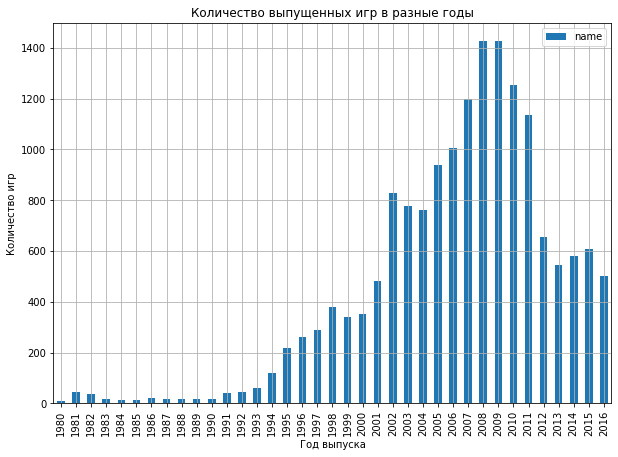

In [18]:
(data
    .pivot_table(index='year_of_release', values='name', aggfunc='count')
    .plot.bar(grid=True, figsize=(10, 7))
)
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.title('Количество выпущенных игр в разные годы')
plt.show()

По графику видно, что пик выпуска компьютерных игр приходится на 2008 и 2009 год. Затем заметен резкий спад после 2011 года, что может быть связано либо с ростом мобильного гейминга, либо с уменьшением количества издаваемых игр из-за переизбытка на рынке.

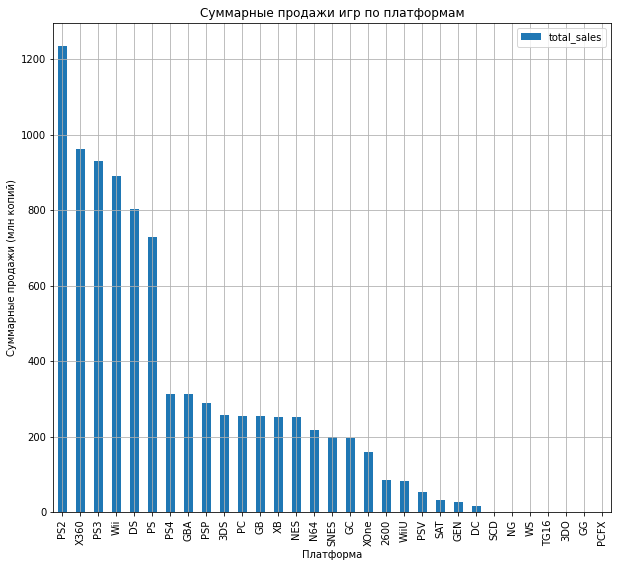

In [19]:
(data
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .plot.bar(grid=True, figsize=(10, 9))
)
plt.title('Суммарные продажи игр по платформам')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи (млн копий)')
plt.show()

Исходя из графика, наиболее популярными платформами для игр были - PlayStation 2, XBOX 360, PlayStation 3, Wii.

In [20]:
sales_top_5 = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).reset_index().head(5)['platform'].tolist()
sales_top_5

['PS2', 'X360', 'PS3', 'Wii', 'DS']

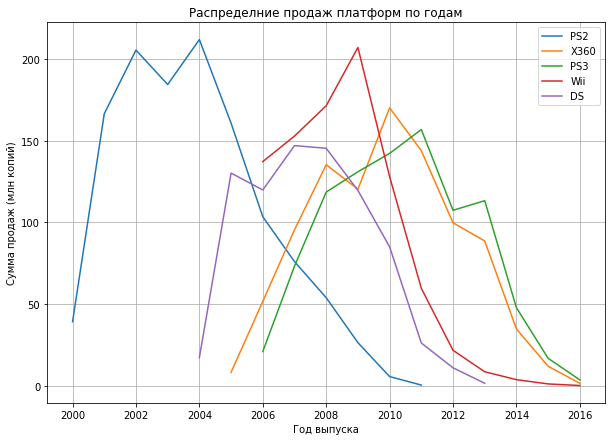

In [21]:
for name in sales_top_5:
    (
    data.query('platform == @name and year_of_release > 1985')
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    .sort_values('year_of_release', ascending = False)['total_sales']
    .plot(figsize=(10, 7), grid=True, label=name)
    )
plt.title('Распределние продаж платформ по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Сумма продаж (млн копий)')
plt.legend()
plt.show()

Исходя из этого графика можно сделать вывод, что характерный срок, за который платформа появляется и исчезает составляет около 10 лет.

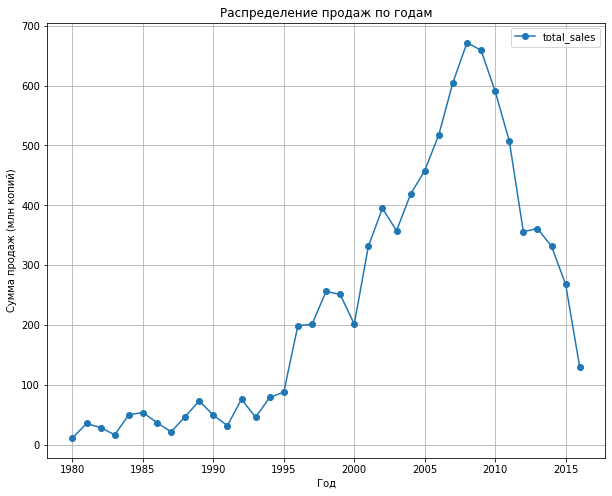

In [22]:
(data
    .groupby('year_of_release')
    .agg({'total_sales':'sum'})
    .plot(kind='line', marker='o', grid=True, figsize=(10, 8))
)
plt.title('Распределение продаж по годам')
plt.xlabel('Год')
plt.ylabel('Сумма продаж (млн копий)')
plt.show()

После 2008 года отмечается резкая смена тенденции продаж на отрицательную.

In [23]:
data_act = data.query('year_of_release == [2014, 2015, 2016]')
data_act.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,n/d,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,0.0,0.0,n/d,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,0.0,0.0,n/d,7.98


Создаем новую переменную data_act, где будут данные за актуальный период, то есть с 2014 по 2016 год.

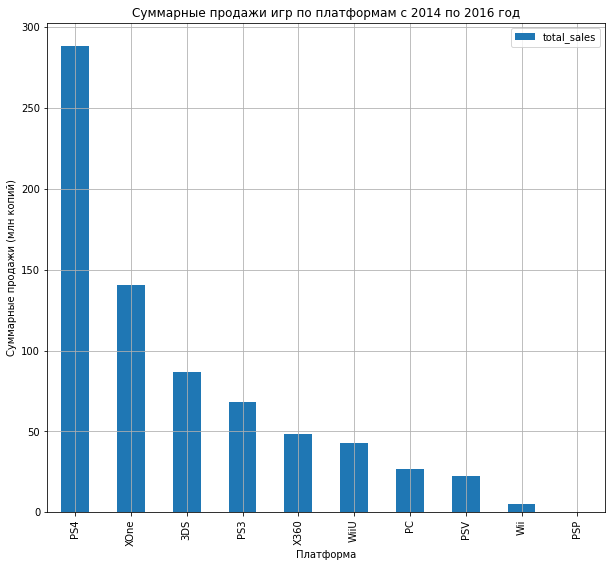

In [24]:
(data_act
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .plot.bar(grid=True, figsize=(10, 9))
)
plt.title('Суммарные продажи игр по платформам c 2014 по 2016 год')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи (млн копий)')
plt.show()

Лидерами по продажам являются PlayStation 4, XBox One, Nintendo 3DS. PC занимает очень маленькую долю, по сравнению с консолями. 

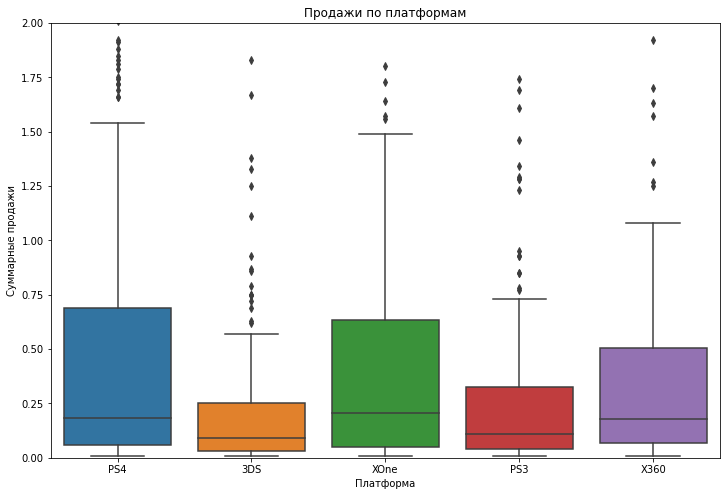

In [25]:
data_act_plt = data_act.query('platform == ["PS4", "XOne", "3DS", "PS3", "X360"]')
plt.figure(figsize=(12,8))
ax = sns.boxplot(data=data_act_plt, x='platform', y='total_sales')
ax.set(ylim=(0,2))
plt.title('Продажи по платформам')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи')
plt.show()

In [26]:
data_act_plt.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000
mean,2014.965969,0.220654,0.203700,0.061850,0.064921,31.511344,3.666230,0.551126
std,0.800476,0.511491,0.547368,0.244133,0.167507,36.516268,3.451845,1.215718
min,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000
50%,2015.000000,0.040000,0.040000,0.000000,0.010000,0.000000,4.300000,0.140000
75%,2016.000000,0.190000,0.160000,0.050000,0.050000,71.000000,7.100000,0.480000
max,2016.000000,6.030000,6.310000,3.180000,2.380000,97.000000,9.200000,14.630000


In [27]:
data_act_plt.groupby('platform')['total_sales'].median()

platform
3DS     0.090
PS3     0.110
PS4     0.185
X360    0.180
XOne    0.205
Name: total_sales, dtype: float64

Построив диаграммы размаха и изучив описание данных, можно сделать вывод, что медианное значение продаж по всем платформам составляет 0.180 млн копий. Также стоит отметить, что присутствует большое количество выбросов в значениях 'total_sales'. У лидеров рынка наблюдается серьезный разброс между квартилями.

In [28]:
data_act_ps4 = data_act.query('platform == "PS4" and critic_score > 0 and user_score > 0')
data_act_xbox = data_act.query('platform == "XOne" and critic_score > 0 and user_score > 0')

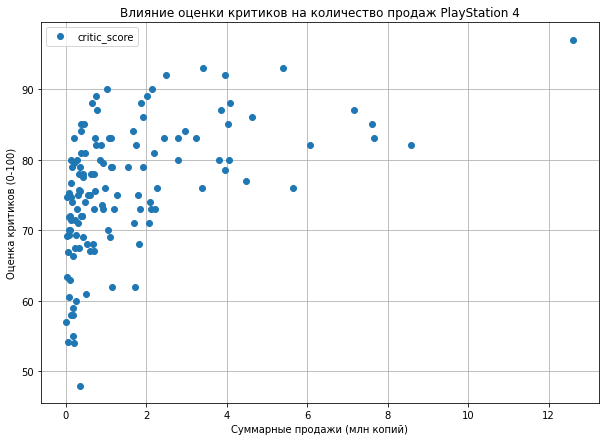

In [29]:
(data_act_ps4
     .pivot_table(index='total_sales', values='critic_score')
     .plot(grid=True, figsize=(10, 7), style='o')
)
plt.title('Влияние оценки критиков на количество продаж PlayStation 4')
plt.xlabel('Суммарные продажи (млн копий)')
plt.ylabel('Оценка критиков (0-100)')
plt.show()

In [30]:
print('Корреляция между оценкой критиков и суммарными продажами PlayStation 4 составляет:', data_act_ps4['total_sales'].corr(data_act_ps4['critic_score']))

Корреляция между оценкой критиков и суммарными продажами PlayStation 4 составляет: 0.40190287811475334


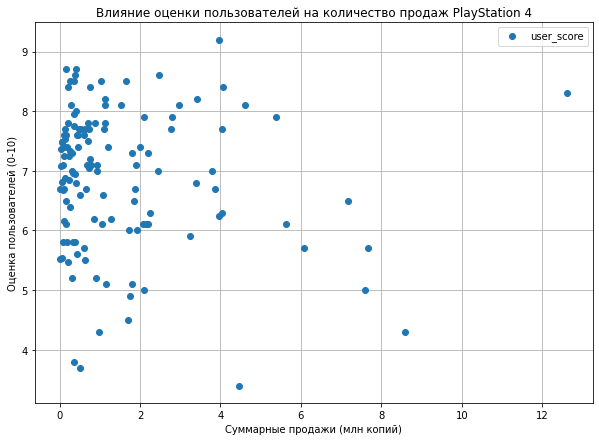

In [31]:
(data_act_ps4
     .pivot_table(index='total_sales', values='user_score')
     .plot(grid=True, figsize=(10, 7), style='o')
)
plt.title('Влияние оценки пользователей на количество продаж PlayStation 4')
plt.xlabel('Суммарные продажи (млн копий)')
plt.ylabel('Оценка пользователей (0-10)')
plt.show()

In [32]:
print('Корреляция между оценкой пользователей и суммарными продажами PlayStation 4 составляет:', data_act_ps4['total_sales'].corr(data_act_ps4['user_score']))

Корреляция между оценкой пользователей и суммарными продажами PlayStation 4 составляет: -0.04318585997193634


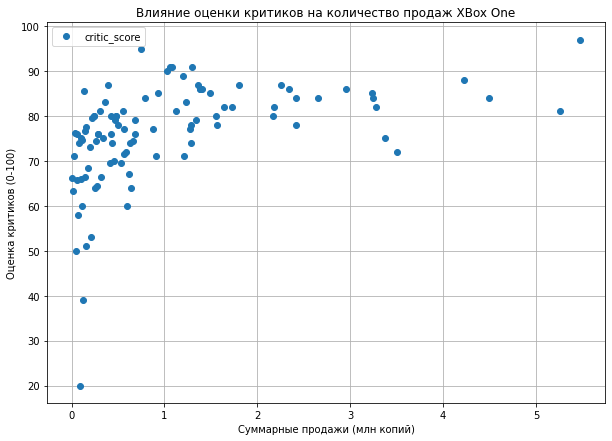

In [33]:
(data_act_xbox
     .pivot_table(index='total_sales', values='critic_score')
     .plot(grid=True, figsize=(10, 7), style='o')
)
plt.title('Влияние оценки критиков на количество продаж XBox One')
plt.xlabel('Суммарные продажи (млн копий)')
plt.ylabel('Оценка критиков (0-100)')
plt.show()

In [34]:
print('Корреляция между оценкой критиков и суммарными продажами Xbox One составляет:', data_act_xbox['total_sales'].corr(data_act_xbox['critic_score']))

Корреляция между оценкой критиков и суммарными продажами Xbox One составляет: 0.4221118510555765


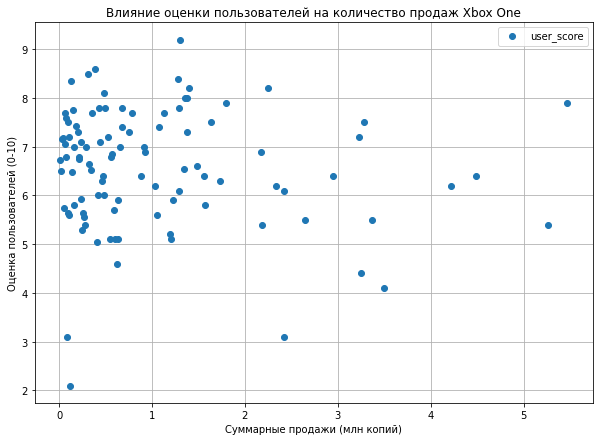

In [35]:
(data_act_xbox
     .pivot_table(index='total_sales', values='user_score')
     .plot(grid=True, figsize=(10, 7), style='o')
)
plt.title('Влияние оценки пользователей на количество продаж Xbox One')
plt.xlabel('Суммарные продажи (млн копий)')
plt.ylabel('Оценка пользователей (0-10)')
plt.show()

In [36]:
print('Корреляция между оценкой пользователей и суммарными продажами Xbox One составляет:', data_act_xbox['total_sales'].corr(data_act_xbox['user_score']))

Корреляция между оценкой пользователей и суммарными продажами Xbox One составляет: -0.09173434503310748


Можно сделать вывод, что оценка пользователей не сильно влияют на количество продаж в целом. Если сравнивать два значения корреляции: оценки пользователей и оценки критиков, то большее воздействие оказывают критики.

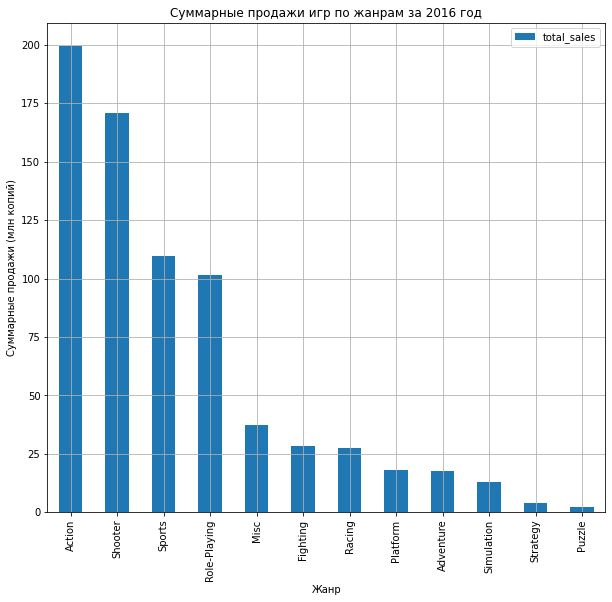

In [37]:
(data_act
    .pivot_table(index='genre', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .plot.bar(grid=True, figsize=(10, 9))
)
plt.title('Суммарные продажи игр по жанрам за 2016 год')
plt.xlabel('Жанр')
plt.ylabel('Суммарные продажи (млн копий)')
plt.show()

Самыми продаваемыми играми являются игры с жанрами: шутер, экшен, спорт и ролевая игра. Остальные жанры остаются менее востребованными на рынке, меньше всего продаются паззлы, стратегии и симуляторы. 

## Портреты пользователей из разных регионов

### Портрет пользователя из Северной Америки

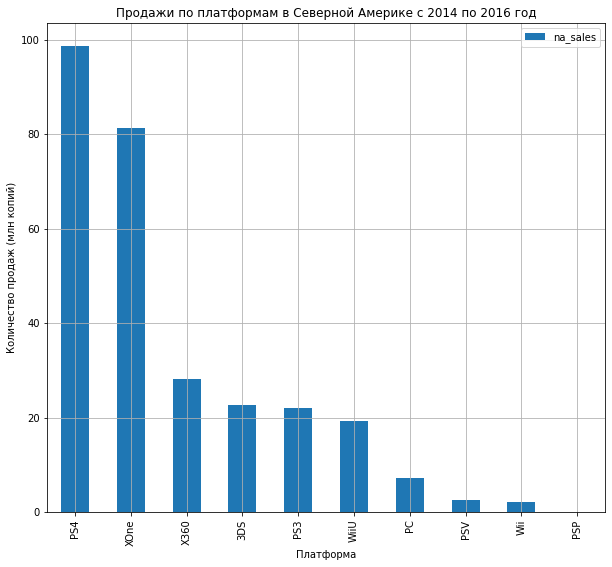

In [38]:
(data_act
    .pivot_table(index='platform', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
    .plot(kind='bar', grid=True, figsize=(10, 9))
)
plt.title('Продажи по платформам в Северной Америке с 2014 по 2016 год')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж (млн копий)')
plt.show()

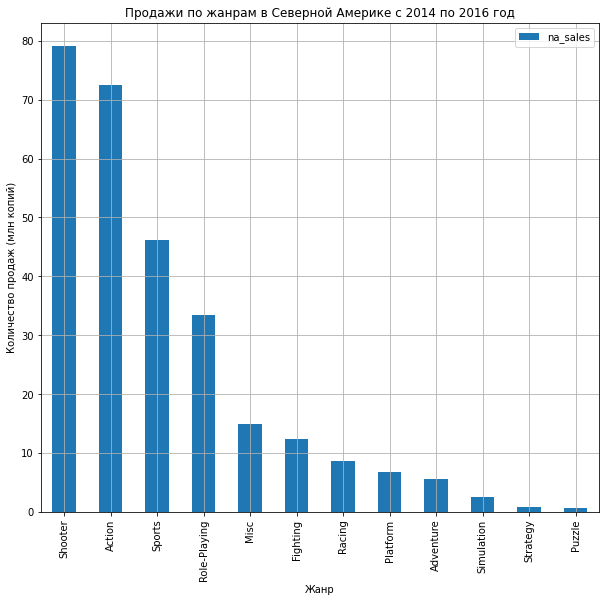

In [39]:
(data_act
    .pivot_table(index='genre', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
    .plot(kind='bar', grid=True, figsize=(10, 9))
)
plt.title('Продажи по жанрам в Северной Америке с 2014 по 2016 год')
plt.xlabel('Жанр')
plt.ylabel('Количество продаж (млн копий)')
plt.show()

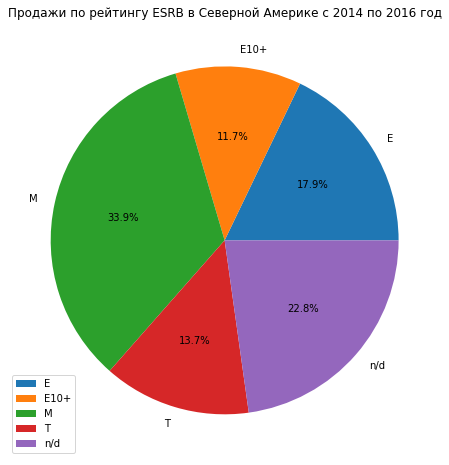

In [40]:
(data_act
    .pivot_table(index='rating', values='na_sales', aggfunc='sum')
    .plot.pie(y='na_sales', figsize=(8, 8), label='', autopct='%1.1f%%')
)
plt.title('Продажи по рейтингу ESRB в Северной Америке с 2014 по 2016 год')
plt.show()

**Вывод из проведенного исследования**
* Среднестатистический пользователь из Северной Америки является поклонником одной из пяти самых популярных платформ для игр: PlayStation 4, XBox One, Nintendo 3DS, Wii U, PC
* Предпочитает игры в жанрах: шутер, экшен, спорт, ролевые игры, Misc
* Исходя из рейтинга ESRB, большинство пользователей взрослые, либо подростки:
    * 13,7% (T) занимает доля игр для тинейджеров
    * 33,9% (M) - игры для людей с возрастом 17+
    * 11,7% и 17,9% занимают игры для всез возрастов, которые понравятся и детям, и взрослым

### Портрет пользователя из Европы

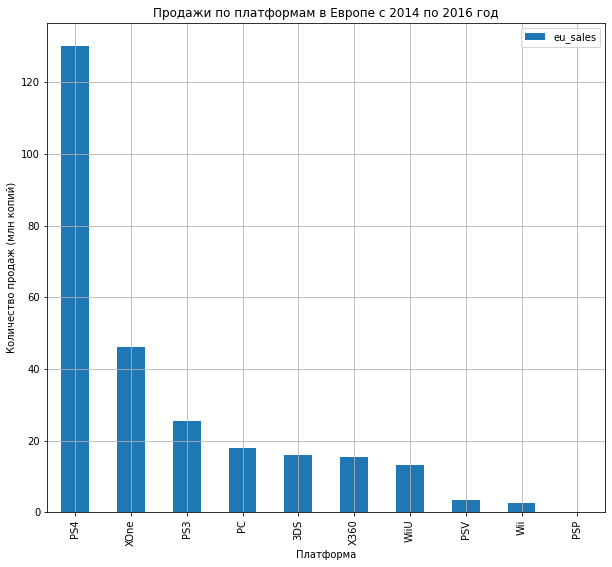

In [41]:
(data_act
    .pivot_table(index='platform', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
    .plot(kind='bar', grid=True, figsize=(10, 9))
)
plt.title('Продажи по платформам в Европе с 2014 по 2016 год')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж (млн копий)')
plt.show()

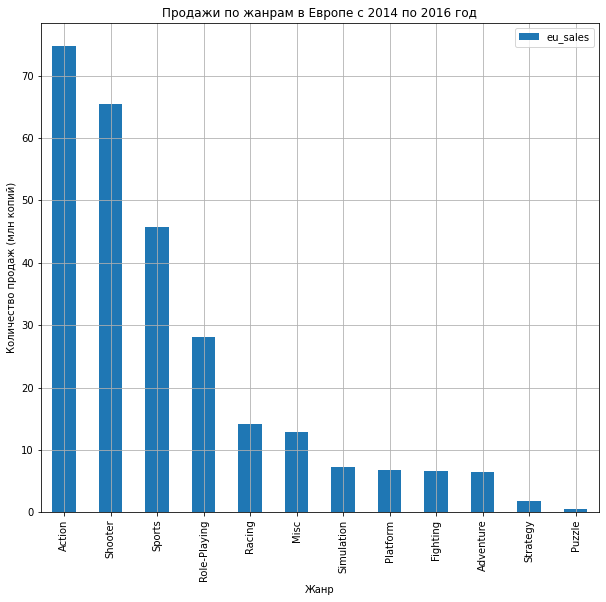

In [42]:
(data_act
    .pivot_table(index='genre', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
    .plot(kind='bar', grid=True, figsize=(10, 9))
)
plt.title('Продажи по жанрам в Европе с 2014 по 2016 год')
plt.xlabel('Жанр')
plt.ylabel('Количество продаж (млн копий)')
plt.show()

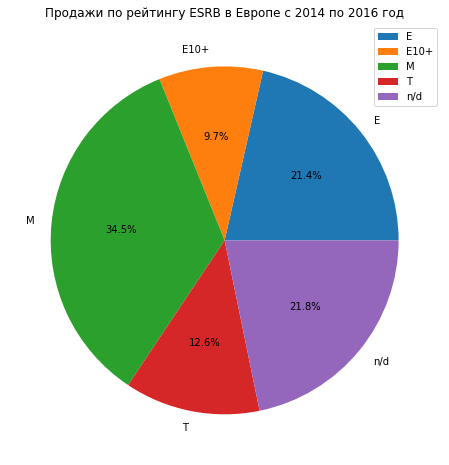

In [43]:
(data_act
    .pivot_table(index='rating', values='eu_sales', aggfunc='sum')
    .plot.pie(y='eu_sales', figsize=(8, 8), label='', autopct='%1.1f%%')
)
plt.title('Продажи по рейтингу ESRB в Европе с 2014 по 2016 год')
plt.show()

**Вывод**
* Пользователи в Европе в болшинстве предпочитают PlayStation 4. Меньшую в 3 раза долю занимает XBox One. PC, Nintendo 3DS, Wii U входят в топ-5 используемых платформ, однако, занимают очень маленькую долю по сравнению с гигантами рынка.
* Предпочитает игры в жанрах: шутер, экшен, спорт, ролевые игры, гонки
* Большую долю рынка по рейтингу ESRB в совокупности занимают игры для всех возрастов (E, E10+), а также для тинейджеров (T). 34,5% занимают игры для лиц, не младше 17 лет (M).

### Портрет пользователя из Японии

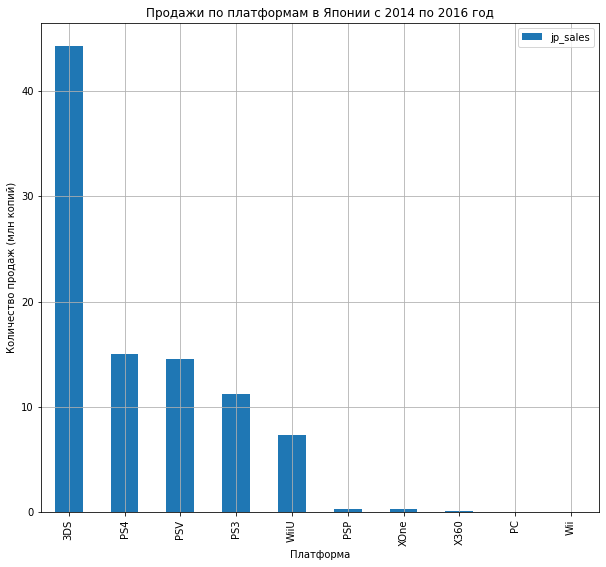

In [44]:
(data_act
    .pivot_table(index='platform', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
    .plot(kind='bar', grid=True, figsize=(10, 9))
)
plt.title('Продажи по платформам в Японии с 2014 по 2016 год')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж (млн копий)')
plt.show()

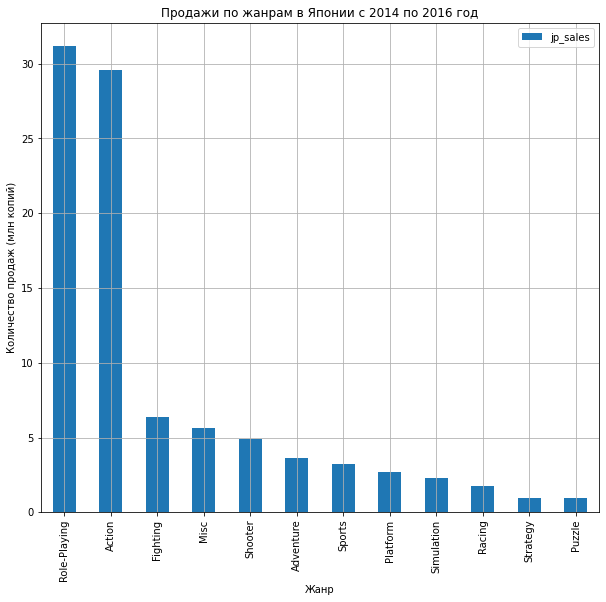

In [45]:
(data_act
    .pivot_table(index='genre', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
    .plot(kind='bar', grid=True, figsize=(10, 9))
)
plt.title('Продажи по жанрам в Японии с 2014 по 2016 год')
plt.xlabel('Жанр')
plt.ylabel('Количество продаж (млн копий)')
plt.show()

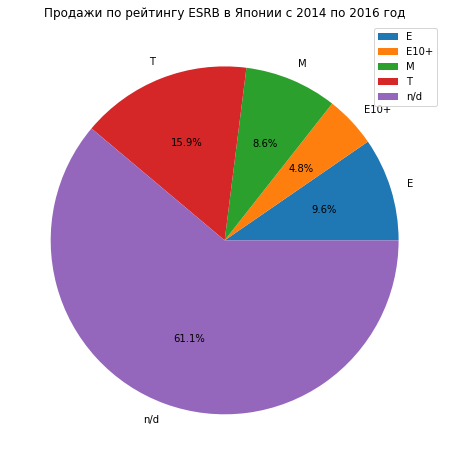

In [46]:
(data_act
    .pivot_table(index='rating', values='jp_sales', aggfunc='sum')
    .plot.pie(y='jp_sales', figsize=(8, 8), label='', autopct='%1.1f%%')
)
plt.title('Продажи по рейтингу ESRB в Японии с 2014 по 2016 год')
plt.show()

**Вывод**

В Японии наблюдается очень интересная картина портрета пользователя из Японии
* Во-первых, больше всего пользуются Nintendo 3DS. На втором месте PlayStation 4; далее идут PlayStation Vita, PlayStation 3, Wii U. Хочется отметить, что производителем этих платформ являются Японсике компании.
* Топ-5 жанров игр, которые предпочитают Японцы: экшен, ролевые игры, файтинг, шутер, Misc
* Что касается игр по рейтингу ESRB, то у 61,1% игр, проданных в Японии он отсутствует. Поэтому судить по меньшинству, я считаю, что некорректно.

*Если обобщить все три вывода, то, в целом, портреты пользователей из Северной Америки и Европы практически не имеют различий. Но на их фоне сильно выделяется портрет пользователя из Японии, что связано со спецификой культуры, менталитета, а также предпочтений и вкусов.*

##  Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC

In [47]:
xbox = data_act.query('platform == "XOne"')
pc = data_act.query('platform == "PC"')
display(xbox.head())
display(pc.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,0.0,0.0,n/d,7.39
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
458,The Sims 4,PC,2014,Simulation,1.00,1.82,0.0,0.23,70.0,3.9,T,3.05
1530,Fallout 4,PC,2015,Role-Playing,0.51,0.67,0.0,0.10,84.0,5.4,M,1.28
1677,Farming Simulator 2015,PC,2014,Simulation,0.08,1.04,0.0,0.07,0.0,0.0,n/d,1.19
1730,Grand Theft Auto V,PC,2015,Action,0.39,0.69,0.0,0.09,96.0,7.9,M,1.17
2303,The Elder Scrolls Online,PC,2014,Role-Playing,0.32,0.51,0.0,0.07,71.0,5.7,M,0.90


Создадим отдельные датафреймы, где будут необходимые данные по нашим платформам

**Нулевая гипотеза** - средние пользовательские рейтинги платформ XBox One и PC одинаковые 

**Альтернативная гипотеза** - пользовательские рейтинги плалатформы XBox One выше

Нулевая гипотеза была сформирована из того, что значения могут быть равны, а альтернативная, потому что, исходя из предыдущих исследований, платформу XBox One используют больше, чем PC.

In [48]:
alpha = 0.05

results = st.ttest_ind(
    xbox['user_score'], 
    pc['user_score'],
    equal_var=False, 
    alternative='greater'
) 

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение: 0.8400945377010094
Не отвергаем нулевую гипотезу


Нулевую гипотезу не получилось отвергнуть, значит есть основания говорить о том, что ретинги пользователей платформ XBox One и PC близки по значению друг к другу.

### Средние пользовательские рейтинги жанров Action и Sports

In [49]:
action = data_act.query('genre == "Action"')
sports = data_act.query('genre == "Sports"')
display(action.head())
display(sports.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
225,The Last of Us,PS4,2014,Action,1.88,2.00,0.07,0.77,0.0,0.0,n/d,4.72
231,Uncharted: The Nathan Drake Collection,PS4,2015,Action,2.07,1.71,0.08,0.76,86.0,8.1,T,4.62
295,Watch Dogs,PS4,2014,Action,1.40,1.90,0.11,0.64,80.0,6.3,M,4.05


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
143,FIFA 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,82.0,5.7,E,6.08
264,FIFA 15,PS3,2014,Sports,0.58,3.02,0.04,0.64,0.0,4.5,E,4.28
314,NBA 2K16,PS4,2015,Sports,2.49,0.66,0.03,0.69,87.0,6.7,E10+,3.87


**Нулевая гипотеза** - средние пользовательские рейтинги жанров Action и Sports одинаковые 

**Альтернативная гипотеза** - средние пользовательские рейтинги жанров Action и Sports не равны

Выбрал значение two-sided, так как в альтернативной гипотезе есть формулировка "не равны"

In [50]:
alpha = 0.05

results = st.ttest_ind(
    action['user_score'], 
    sports['user_score'],
    equal_var=False, 
    alternative='two-sided' 
) 

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение: 0.0006646333120910831
Отвергаем нулевую гипотезу


Нулевая гипотеза была отвергнута, это значит, что значения рейтингов пользователей по жанрам Action и Sports разнятся.

In [51]:
print('Среднее значение рейтинга пользователей жанра Action:', action['user_score'].mean().round(2))
print('Среднее значение рейтинга пользователей жанра Sports:', sports['user_score'].mean().round(2))

Среднее значение рейтинга пользователей жанра Action: 3.24
Среднее значение рейтинга пользователей жанра Sports: 4.12


Как видим, игры жанра Sports оценивают выше, чем игры жанра Action

## Общий вывод

По результатам проделанной работы можно сделать вывод, что в данных было достаточно большое количество пропусков, которые были устранены на этапе предобработки. Дубликатов обнаружено не было. Была также проделана работа по изменению типов данных в некоторых столбцах для дальнейшей работы с данными. 

Исходя из исследовательского анализа, можно отметить, что:
1. Пик выпуска компьютерных игр приходится на 2008 и 2009 год. Затем заметен резкий спад после 2011 года;
2. За всю историю игр наиболее популярными платформами были - PlayStation 2, XBOX 360, PlayStation 3, Wii;
3. Средний срок жизни платформы - около 10 лет;
4. После 2008 года отмечается резкая смена тенденции суммарных продаж по всем платформам на отрицательную;
5. Есть умеренная взаимосвязь между суммарными продажами и оценкой критиков, однако, оценка пользователей почти не влияет на количество продаж.
6. Самыми продаваемыми играми являются игры с жанрами: шутер, экшен, спорт и ролевая игра.

Были составлены портреты пользователей из Северной Америки, Европы и Японии. Портреты пользователей из Северной Америки и Европы практически не имеют различий. Но на их фоне сильно выделяется портрет пользователя из Японии, что связано со спецификой культуры, менталитета, а также предпочтений и вкусов.

Также были поставлены и проверены гипотезы. Сделаны выводы:
* Ретинги пользователей платформ XBox One и PC близки по значению друг к другу.
* Игры жанра Sports оценивают выше, чем игры жанра Action

В итоге, для увеличения прибыли интернет-магазину «Стримчик» необходимо сделать акцент на продвижение игр на платформе PlayStation 4, XBox One, а также Nintendo 3DS, с жанрами шутер, экшен, спорт, предназначенных для возрастной группы от 10+ лет.